In [76]:
from __future__ import absolute_import
from __future__ import print_function
from __future__ import division

import os

import numpy as np
from skimage.io import imread
from skimage.external.tifffile import TiffFile
from tensorflow.python.keras import backend as K
from skimage import feature
from skimage.exposure import histogram

import skimage as sk
from skimage.external import tifffile as tiff
from skimage.measure import regionprops
from scipy import ndimage
import scipy
import math

from statistics import median
import matplotlib.pyplot as plt

In [2]:
def get_image(file_name):
    """
    Read image from file and load into numpy array
    """
    ext = os.path.splitext(file_name.lower())[-1]
    if ext == '.tif' or ext == '.tiff':
        return np.float32(TiffFile(file_name).asarray())
    return np.float32(imread(file_name))

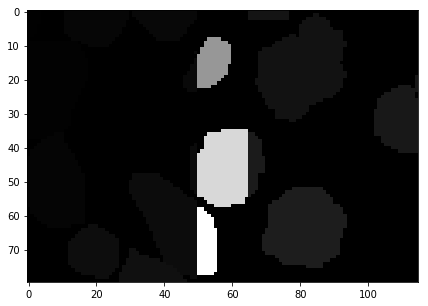

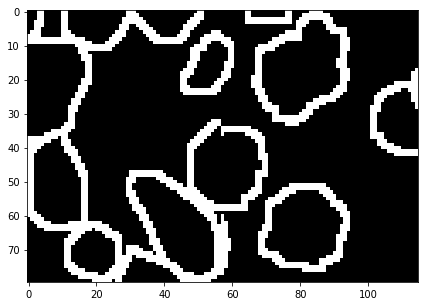

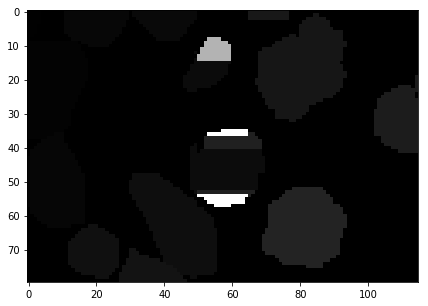

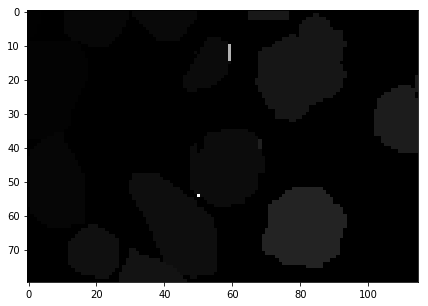

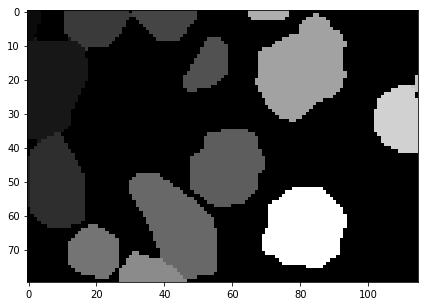

[ 0  1  2  3  4  5  6  7  8  9 10 12 14 15 17 18 22]


In [100]:
label = imread('/Users/isabellacamplisson/6lines.png')
label2 = imread('/Users/isabellacamplisson/7lines.png')

img = imread('/Users/isabellacamplisson/6.png')
img2 = imread('/Users/isabellacamplisson/7.png')

img = img[:,:,0]
img2 = img2[:,:,0]

img2 = img2 + max(np.unique(img)) + 1

for row in range(img2.shape[0]):
    for column in range(img2.shape[1]):
        if img2[row][column] == max(np.unique(img)) + 1:
            img2[row][column] = 0

overlap_x = 15

overlap = (img[:, -overlap_x:])*(img2[:, :overlap_x])

image = np.concatenate((img[:, overlap_x:-overlap_x], overlap, img2[:, overlap_x:-overlap_x]), axis=1)

plt.figure(figsize=(15,5))
plt.imshow(image, interpolation='none', cmap='gray')
plt.show()


p = overlap_x

big_label = np.concatenate((label[:, p:-(p-7)], label2[:, p-8:-p]), axis =1)
    
grey = image

plt.figure(figsize=(15,5))
plt.imshow(big_label, interpolation='none', cmap='gray')
plt.show()

for row in range(grey.shape[0]):
    for column in range(grey.shape[1]-2):
        if grey[row][column] is not grey[row][column+2]: 
            if grey[row][column] != 0 and grey[row][column+2] != 0:
                if big_label[row][column+1] != 255: 
                    no = max(grey[row][column], grey[row][column+2])
                    yes = min(grey[row][column], grey[row][column+2])
                    for value in range(grey.shape[1]-2):
                        if grey[row][value] == no:
                            grey[row][value] = yes
                        if grey[row][value+2] == no:
                            grey[row][value+2] = yes

plt.figure(figsize=(15,5))
plt.imshow(grey, interpolation='none', cmap='gray')
plt.show()
                            
for column in range(grey.shape[1]):
    for row in range(grey.shape[0]-2):
        if grey[row][column] is not grey[row+2][column]: 
            if grey[row][column] != 0 and grey[row+2][column] != 0:
                if big_label[row+1][column] != 255: 
                    no = max(grey[row][column], grey[row+2][column])
                    yes = min(grey[row][column], grey[row+2][column])
                    for value in range(grey.shape[0]-2):
                        if grey[value][column] == no:
                            grey[value][column] = yes
                        if grey[value+2][column] == no:
                            grey[value+2][column] = yes

plt.figure(figsize=(15,5))
plt.imshow(grey, interpolation='none', cmap='gray')
plt.show()

for row in range(1, grey.shape[0]-1):
    for column in range(1, grey.shape[1]-1):
        bad = []
        surrounding = [grey[row][column], grey[row-1][column-1], grey[row-1][column], grey[row-1][column+1],
                      grey[row][column-1], grey[row][column+1], grey[row+1][column-1], grey[row+1][column],
                      grey[row+1][column+1]]
        for tag in surrounding[1:]:
            if tag != surrounding[0]:
                bad.append(tag)
        if len(bad)>4:
            grey[row][column] = np.bincount(bad).argmax()

plt.figure(figsize=(15,5))
plt.imshow(grey, interpolation='none', cmap='gray')
plt.show()

print(np.unique(grey))